Salary_data

In [2]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import files
upload=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [4]:
df_train=pd.read_csv('SalaryData_Train(1).csv')

In [5]:
from google.colab import files
upload=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [6]:
df_test=pd.read_csv('SalaryData_Test(1).csv')

EDA

In [7]:
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [9]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [13]:
df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [14]:
df_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [15]:
df_train.shape

(30161, 14)

In [16]:
df_test.shape

(15060, 14)

In [17]:
df_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [18]:
df_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [20]:
df_train.isna()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30157,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30158,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30159,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df_test.isna()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15056,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15057,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15058,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [23]:
df_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [25]:
df_train.duplicated().sum()

3258

In [26]:
df_test.duplicated().sum()

930

In [27]:
df_train.value_counts()

age  workclass          education      educationno  maritalstatus        occupation        relationship     race                 sex      capitalgain  capitalloss  hoursperweek  native          Salary
33    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40             United-States   <=50K    16
35    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40             United-States   <=50K    15
39    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40             United-States   <=50K    14
51    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40            

In [28]:
df_test.value_counts()

age  workclass          education      educationno  maritalstatus        occupation          relationship    race    sex      capitalgain  capitalloss  hoursperweek  native          Salary
40    Private            HS-grad       9             Married-civ-spouse   Craft-repair        Husband         White   Male    0            0            40             United-States   <=50K    9
31    Private            HS-grad       9             Married-civ-spouse   Craft-repair        Husband         White   Male    0            0            40             United-States   <=50K    8
33    Private            HS-grad       9             Married-civ-spouse   Machine-op-inspct   Husband         White   Male    0            0            40             United-States   <=50K    8
32    Private            HS-grad       9             Married-civ-spouse   Craft-repair        Husband         White   Male    0            0            40             United-States   <=50K    8
36    Private            HS-grad   

Converting categorical columns to numerical columns

In [29]:
#label encoding
df_train=df_train.apply(LabelEncoder().fit_transform)
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [30]:
#label encoding
df_test=df_test.apply(LabelEncoder().fit_transform)
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


Data Visualization

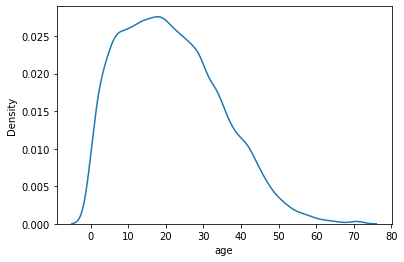

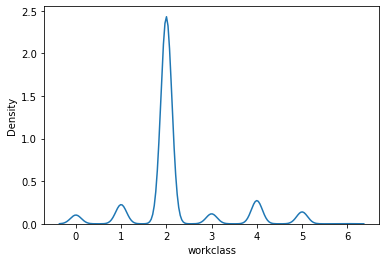

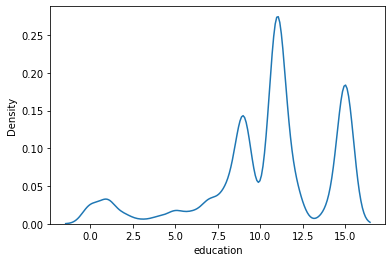

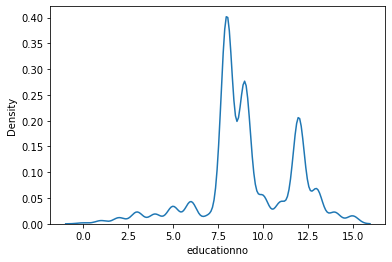

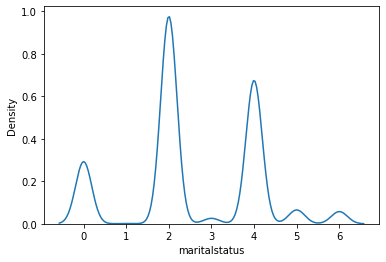

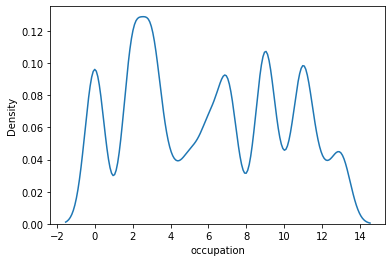

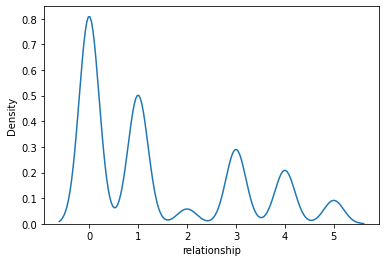

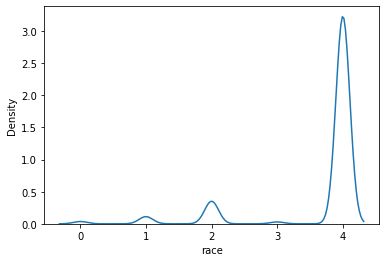

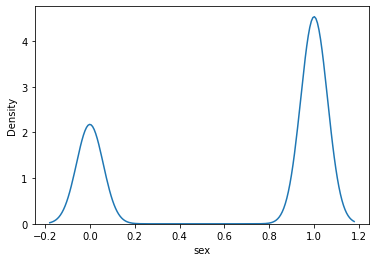

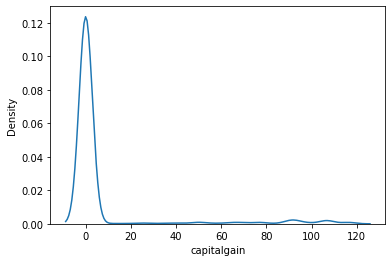

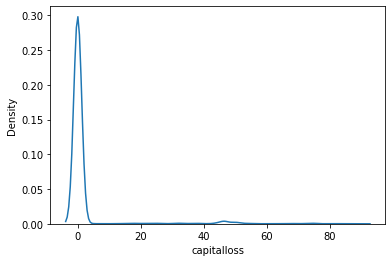

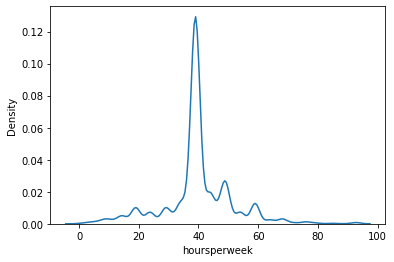

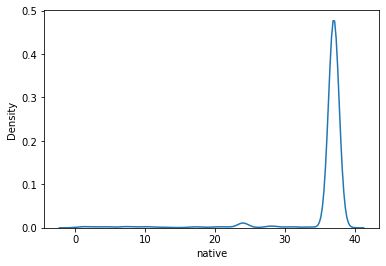

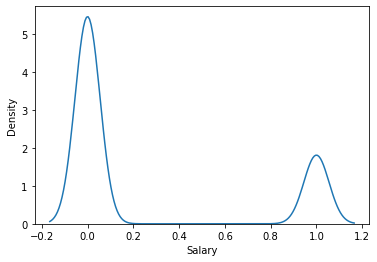

In [31]:
#Kernel density
for n in df_train.columns:
  sns.kdeplot(df_train[n])
  plt.show()

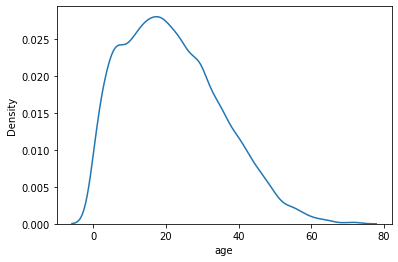

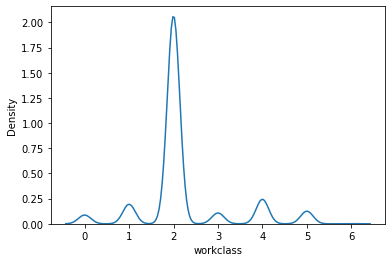

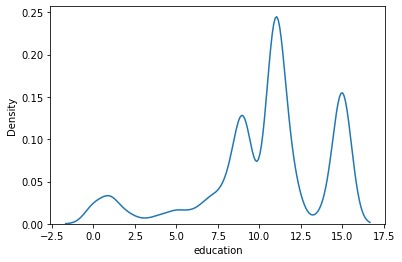

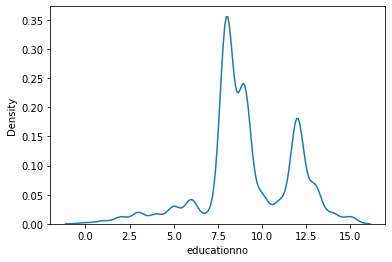

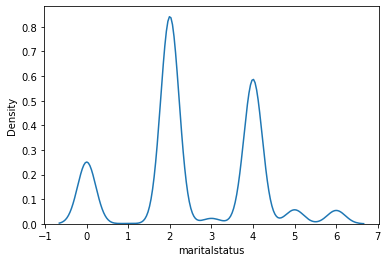

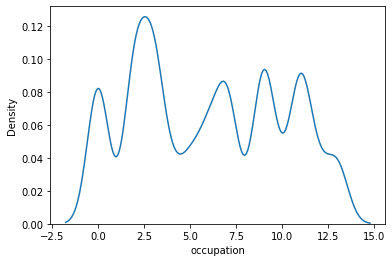

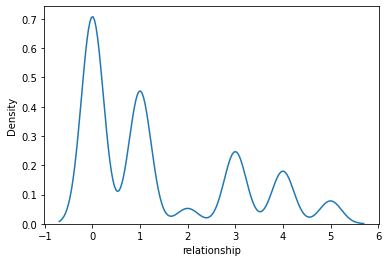

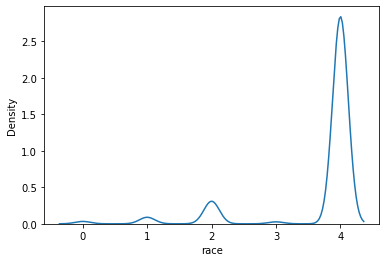

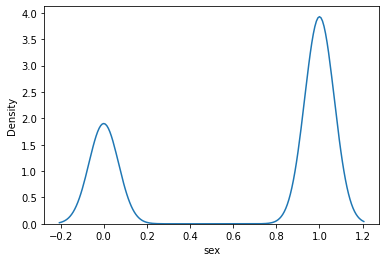

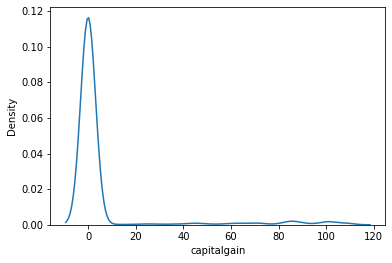

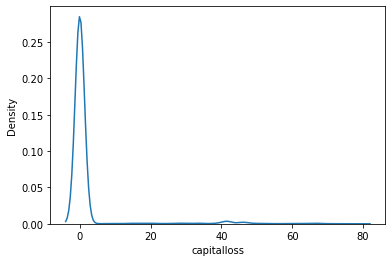

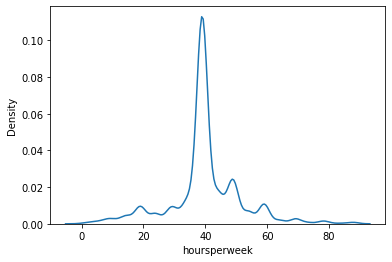

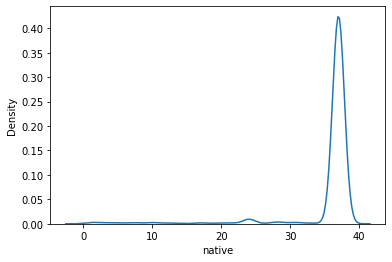

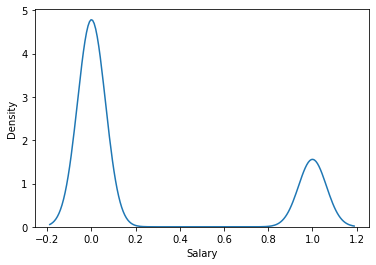

In [32]:
#Kernel density
for n in df_test.columns:
  sns.kdeplot(df_test[n])
  plt.show()

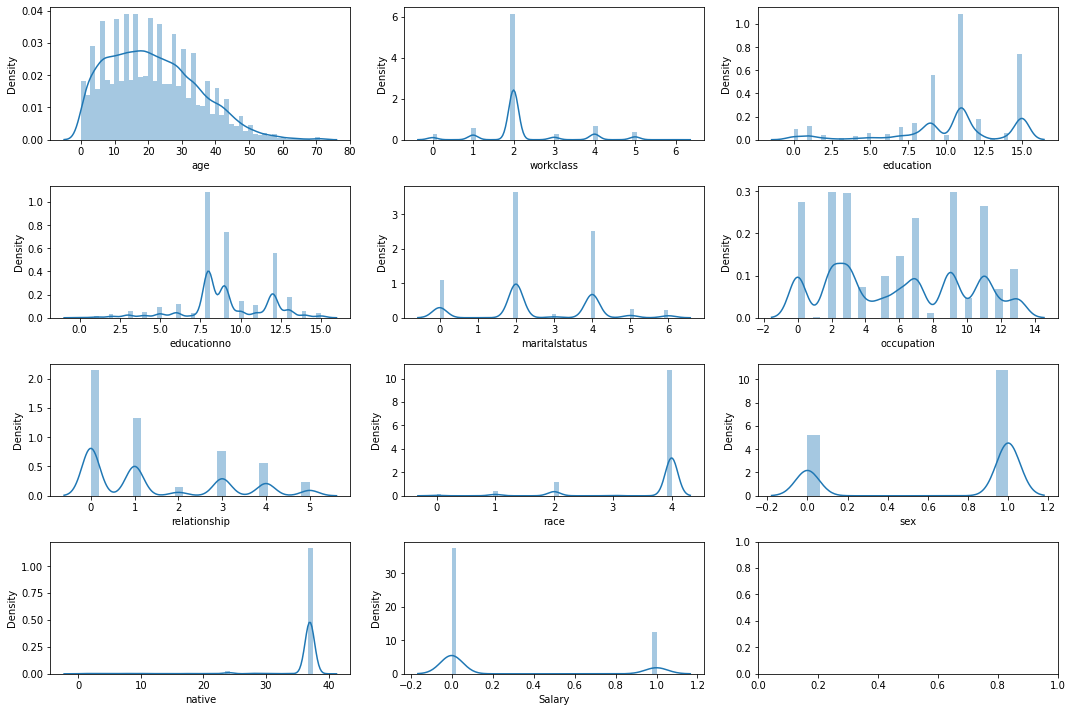

In [45]:
fig, ax=plt.subplots(4,3, figsize=(15,10))

sns.distplot(df_train.age, ax=ax[0,0])
sns.distplot(df_train.workclass, ax=ax[0,1])
sns.distplot(df_train.education, ax=ax[0,2])
sns.distplot(df_train.educationno, ax=ax[1,0])
sns.distplot(df_train.maritalstatus, ax=ax[1,1])
sns.distplot(df_train.occupation, ax=ax[1,2])
sns.distplot(df_train.relationship, ax=ax[2,0])
sns.distplot(df_train.race, ax=ax[2,1])
sns.distplot(df_train.sex, ax=ax[2,2])
sns.distplot(df_train.native, ax=ax[3,0])
sns.distplot(df_train.Salary, ax=ax[3,1])

plt.tight_layout()
plt.show()

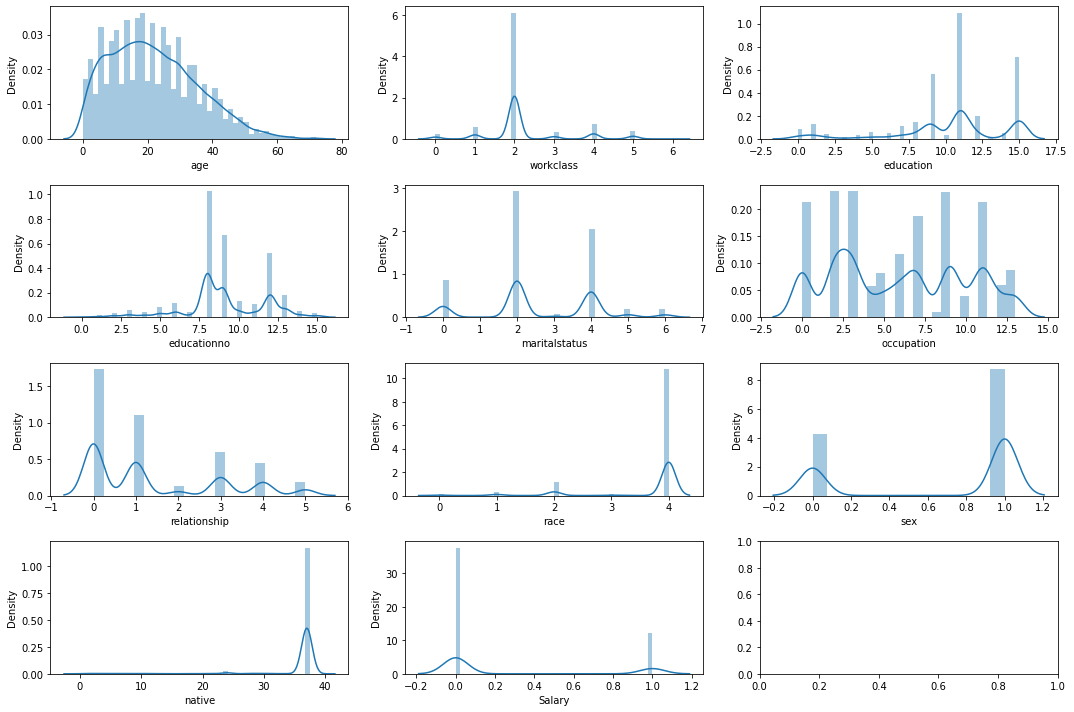

In [46]:
fig, ax=plt.subplots(4,3, figsize=(15,10))

sns.distplot(df_test.age, ax=ax[0,0])
sns.distplot(df_test.workclass, ax=ax[0,1])
sns.distplot(df_test.education, ax=ax[0,2])
sns.distplot(df_test.educationno, ax=ax[1,0])
sns.distplot(df_test.maritalstatus, ax=ax[1,1])
sns.distplot(df_test.occupation, ax=ax[1,2])
sns.distplot(df_test.relationship, ax=ax[2,0])
sns.distplot(df_test.race, ax=ax[2,1])
sns.distplot(df_test.sex, ax=ax[2,2])
sns.distplot(df_test.native, ax=ax[3,0])
sns.distplot(df_test.Salary, ax=ax[3,1])

plt.tight_layout()
plt.show()

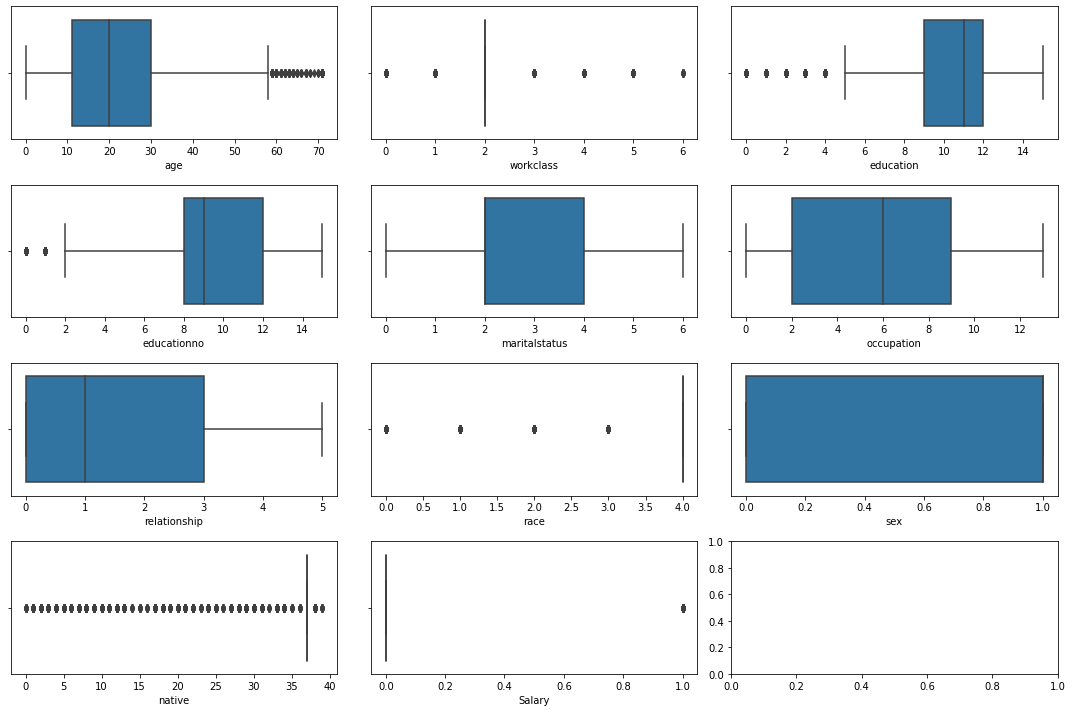

In [48]:
#boxplot
fig, ax=plt.subplots(4,3, figsize=(15,10))

sns.boxplot(df_train.age, ax=ax[0,0])
sns.boxplot(df_train.workclass, ax=ax[0,1])
sns.boxplot(df_train.education, ax=ax[0,2])
sns.boxplot(df_train.educationno, ax=ax[1,0])
sns.boxplot(df_train.maritalstatus, ax=ax[1,1])
sns.boxplot(df_train.occupation, ax=ax[1,2])
sns.boxplot(df_train.relationship, ax=ax[2,0])
sns.boxplot(df_train.race, ax=ax[2,1])
sns.boxplot(df_train.sex, ax=ax[2,2])
sns.boxplot(df_train.native, ax=ax[3,0])
sns.boxplot(df_train.Salary, ax=ax[3,1])

plt.tight_layout()
plt.show()

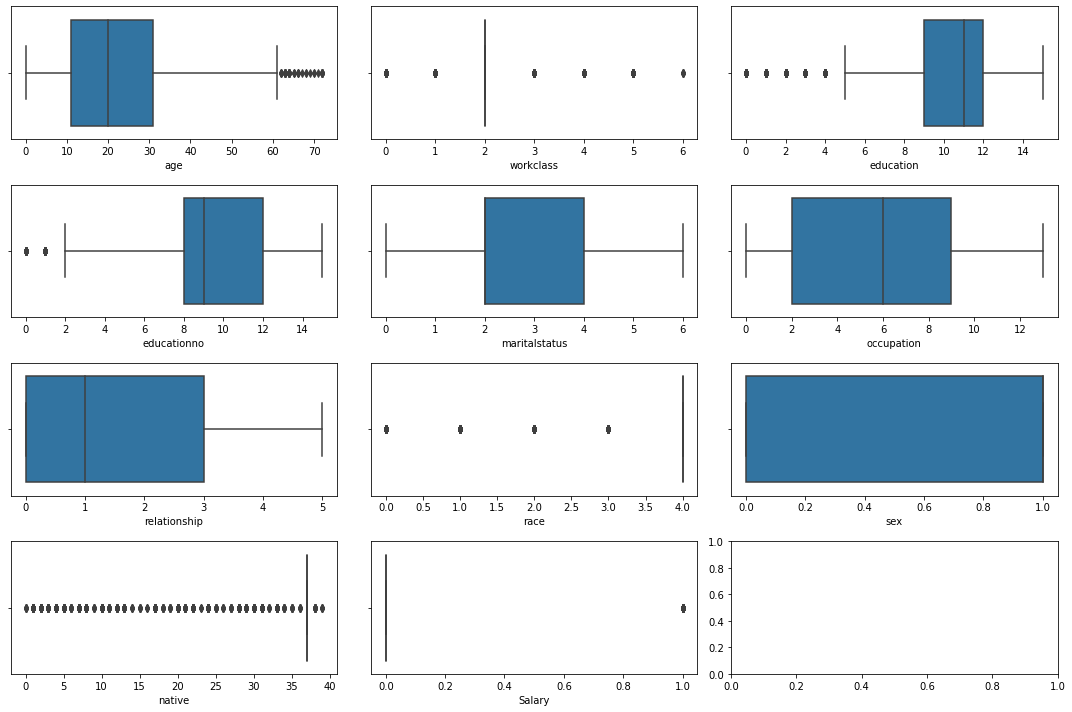

In [49]:
#box plot
fig, ax=plt.subplots(4,3, figsize=(15,10))

sns.boxplot(df_test.age, ax=ax[0,0])
sns.boxplot(df_test.workclass, ax=ax[0,1])
sns.boxplot(df_test.education, ax=ax[0,2])
sns.boxplot(df_test.educationno, ax=ax[1,0])
sns.boxplot(df_test.maritalstatus, ax=ax[1,1])
sns.boxplot(df_test.occupation, ax=ax[1,2])
sns.boxplot(df_test.relationship, ax=ax[2,0])
sns.boxplot(df_test.race, ax=ax[2,1])
sns.boxplot(df_test.sex, ax=ax[2,2])
sns.boxplot(df_test.native, ax=ax[3,0])
sns.boxplot(df_test.Salary, ax=ax[3,1])

plt.tight_layout()
plt.show()

Selecting the independent and dependent variales

In [33]:
X_train=df_train.drop(['education','relationship','native','maritalstatus','sex','race'],axis=1).values
Y_train=df_train['Salary'].values

In [34]:
X_train

array([[22,  5, 12, ...,  0, 39,  0],
       [33,  4, 12, ...,  0, 12,  0],
       [21,  2,  8, ...,  0, 39,  0],
       ...,
       [41,  2,  8, ...,  0, 39,  0],
       [ 5,  2,  8, ...,  0, 19,  0],
       [35,  3,  8, ...,  0, 39,  1]])

In [35]:
Y_train

array([0, 0, 0, ..., 0, 0, 1])

In [36]:
X_test=df_test.drop(['education','relationship','native','maritalstatus','sex','race'],axis=1).values
Y_test=df_test['Salary'].values

In [37]:
X_test

array([[ 8,  2,  6, ...,  0, 39,  0],
       [21,  2,  8, ...,  0, 49,  0],
       [11,  1, 11, ...,  0, 39,  1],
       ...,
       [21,  2, 12, ...,  0, 49,  0],
       [27,  2, 12, ...,  0, 39,  0],
       [18,  3, 12, ...,  0, 59,  1]])

In [38]:
Y_test

array([0, 0, 1, ..., 0, 0, 1])

BUILDING VARIOUS MODELS TO CHECK HIGH ACCURACY

Constructing linear support vector machine at gamma value=0.22 and checking accuracy of the model

In [40]:
svc=SVC(gamma=0.22)
svc.fit(X_train,Y_train)
score_svc=svc.score(X_test,Y_test)
print("The accurcay of SVC is:",score_svc)

The accurcay of SVC is: 0.8978087649402391


Constructing Radial support vector machine model and checking accuracy of the model

In [43]:
svc_radial=svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radial.fit(X_train,Y_train)
score_svc_radial=svc_radial.score(X_test,Y_test)
print("The accurcay of Radial SVC is:",score_svc_radial)

The accurcay of Radial SVC is: 0.8978087649402391


Constructing a support vector machines with sigmoid function in the kernel and checking accuracy

In [50]:
svc_radial=svm.SVC(kernel='sigmoid',C=1,gamma=0.22)
svc_radial.fit(X_train,Y_train)
score_svc_radial=svc_radial.score(X_test,Y_test)
print("The accurcay of Sigmoid SVC is:",score_svc_radial)

The accurcay of Sigmoid SVC is: 0.7543160690571049


Constructing a support vector machine with gamma value=0.33 and checking the accuracy of the model

In [51]:
svc=SVC(gamma=0.33)
svc.fit(X_train,Y_train)
score_svc=svc.score(X_test,Y_test)
print("The accurcay of SVC is:",score_svc)

The accurcay of SVC is: 0.8841965471447543


Constructing the support vector machine with polynomial function in the kernel and checking accuracy of the model

In [52]:
svc_radial=svm.SVC(kernel='poly',C=1,gamma=0.33)
svc_radial.fit(X_train,Y_train)
score_svc_radial=svc_radial.score(X_test,Y_test)
print("The accurcay of Poly SVC is:",score_svc_radial)

The accurcay of Poly SVC is: 1.0


Hence,the polynomial function in the kernal gives the highest accuracy of support vector machine model(i.e.,100%) .So,we use this model to construct SVM model.

In [56]:
#SVM model
clf=SVC(kernel='poly',C=1,gamma=0.33)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 100.0


array([[11360,     0],
       [    0,  3700]])

Classification Matrix

In [58]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11360
           1       1.00      1.00      1.00      3700

    accuracy                           1.00     15060
   macro avg       1.00      1.00      1.00     15060
weighted avg       1.00      1.00      1.00     15060



Visualizing Y_test and y_pred

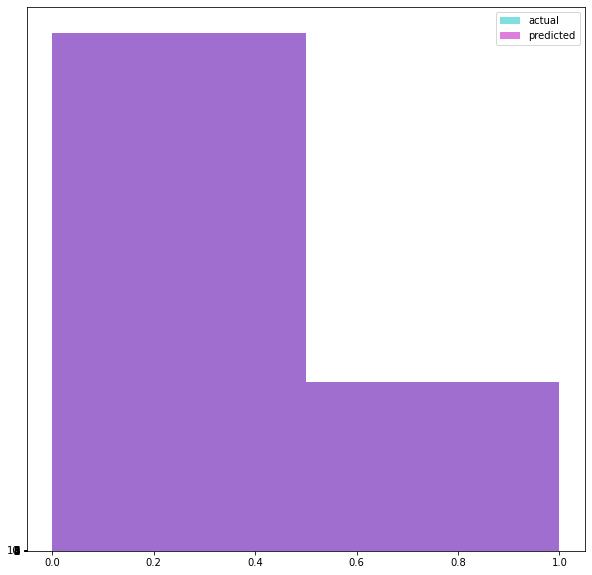

In [61]:
plt.rcParams['figure.figsize']=(10,10)
_,ax=plt.subplots()
ax.hist(Y_test,color='c',alpha=0.5,label='actual',bins=2)
ax.hist(y_pred,color='m',alpha=0.5,label='predicted',bins=2)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc='best')
plt.show()

Conclusion:Therefore,by comparing all SVM models,polynomial kernel suport vector machine model gives highest accuracy(100%).

So,polynomial kernel SVM model can be used to classify the Salary data with accuracy of 100%.



Forest_Fires Data

In [84]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [64]:
from google.colab import files
upload=files.upload()

Saving forestfires (1).csv to forestfires (1) (1).csv


In [66]:
data=pd.read_csv('forestfires (1).csv')

EDA

In [67]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [68]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [70]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
data.isna()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [73]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [74]:
data.duplicated().sum()

8

In [75]:
data.value_counts()

month  day  FFMC  DMC    DC     ISI   temp  RH  wind  rain  area    dayfri  daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  size_category
aug    fri  91.0  166.9  752.6  7.1   25.9  41  3.6   0.0   0.00    1       0       0       0       0       0       0       0         1         0         0         0         0         0         0         0         0         0         0         small            2
       sat  93.7  231.1  715.1  8.4   18.9  64  4.9   0.0   0.00    0       0       1       0       0       0       0       0         1         0         0         0         0         0         0         0         0         0         0         small            2
       sun  91.4  142.4  601.4  10.6  19.8  39  5.4   0.0   0.00    0       0       0       1       0       0       0       0         1         0         0         0         0         0         0         0         0 

Dropping the columns that are already  one hot encoded in data.

In [77]:
data1=data.drop(data.columns[11:30],axis=1)

In [78]:
data1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


Data Visualization

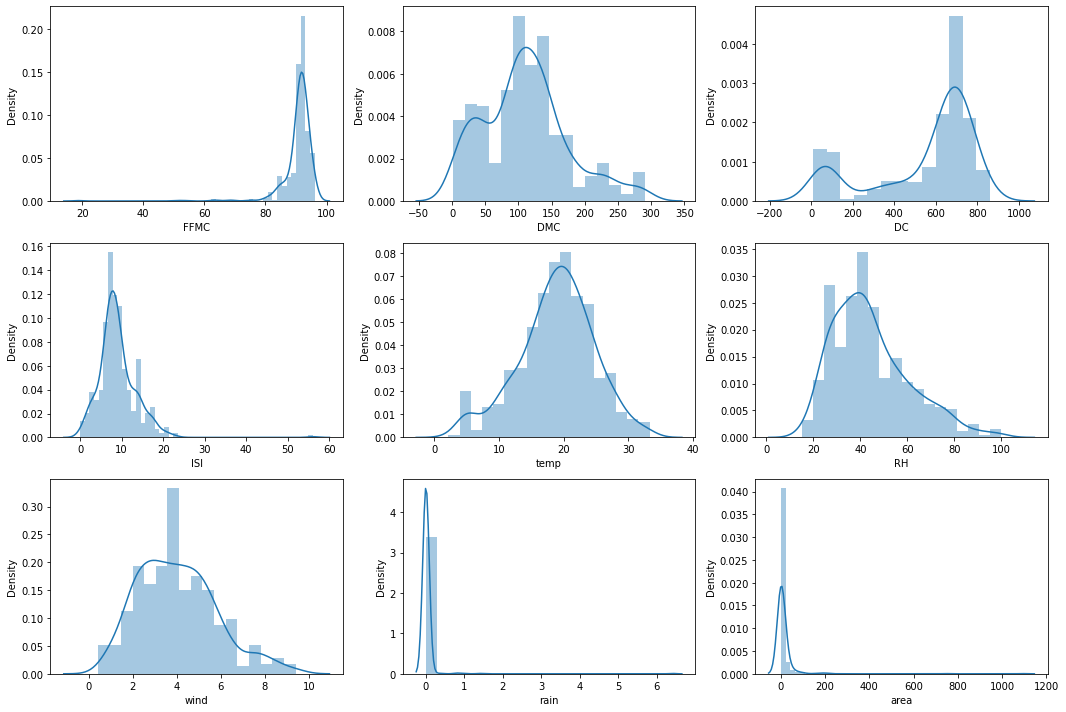

In [79]:
fig, ax=plt.subplots(3,3, figsize=(15,10))

sns.distplot(data1.FFMC, ax=ax[0,0])
sns.distplot(data1.DMC, ax=ax[0,1])
sns.distplot(data1.DC, ax=ax[0,2])
sns.distplot(data1.ISI, ax=ax[1,0])
sns.distplot(data1.temp, ax=ax[1,1])
sns.distplot(data1.RH, ax=ax[1,2])
sns.distplot(data1.wind, ax=ax[2,0])
sns.distplot(data1.rain, ax=ax[2,1])
sns.distplot(data1.area, ax=ax[2,2])

plt.tight_layout()
plt.show()

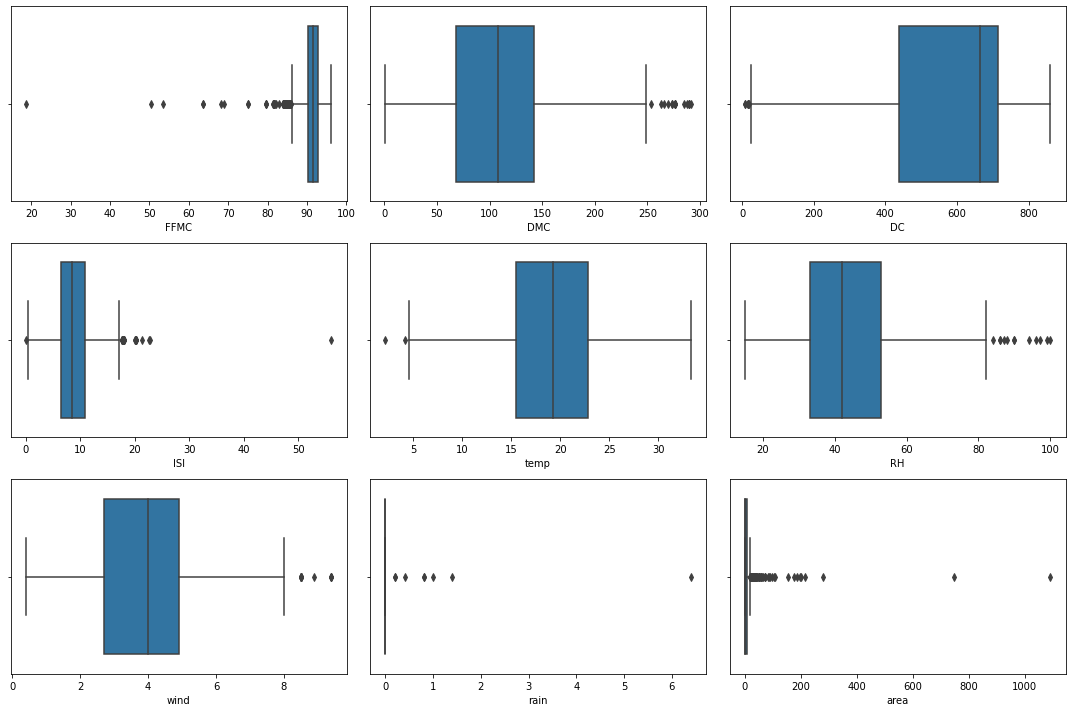

In [80]:
#boxplot
fig, ax=plt.subplots(3,3, figsize=(15,10))

sns.boxplot(data1.FFMC, ax=ax[0,0])
sns.boxplot(data1.DMC, ax=ax[0,1])
sns.boxplot(data1.DC, ax=ax[0,2])
sns.boxplot(data1.ISI, ax=ax[1,0])
sns.boxplot(data1.temp, ax=ax[1,1])
sns.boxplot(data1.RH, ax=ax[1,2])
sns.boxplot(data1.wind, ax=ax[2,0])
sns.boxplot(data1.rain, ax=ax[2,1])
sns.boxplot(data1.area, ax=ax[2,2])

plt.tight_layout()
plt.show()

Converting categorical columns to numerical columns

In [86]:
label_encoder=preprocessing.LabelEncoder()
data1["size_category"]=label_encoder.fit_transform(data1["size_category"])

In [87]:
data1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


Converting categorical values of months and days to numeric values

In [92]:
data1.month.replace(("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
data1.day.replace(("mon","tue","wed","thu","fri","sat","sun"),(1,2,3,4,5,6,7),inplace=True)

In [93]:
data1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [94]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 48.6 KB


In [95]:
data1.shape

(517, 12)

In [96]:
data1.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

Selecting the independent and dependent variables

In [97]:
X=data1.iloc[:,0:11]
Y=data1.iloc[:,-1]

In [98]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [99]:
X.values

array([[ 3.  ,  5.  , 86.2 , ...,  6.7 ,  0.  ,  0.  ],
       [10.  ,  2.  , 90.6 , ...,  0.9 ,  0.  ,  0.  ],
       [10.  ,  6.  , 90.6 , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 8.  ,  7.  , 81.6 , ...,  6.7 ,  0.  , 11.16],
       [ 8.  ,  6.  , 94.4 , ...,  4.  ,  0.  ,  0.  ],
       [11.  ,  2.  , 79.5 , ...,  4.5 ,  0.  ,  0.  ]])

In [100]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [101]:
Y.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

Splitting the data into train and test data

In [102]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [103]:
X_train.shape,Y_train.shape

((361, 11), (361,))

In [104]:
X_test.shape,Y_test.shape

((156, 11), (156,))

Grid Search CV

Constructing SVM model with kernel rbf and running it for best values on grid search

In [106]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [107]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7367867867867868)

Constructing SVM model on the best values obtained by GridSearch CV

In [108]:
clf = SVC(C= 15, gamma = 0.5)
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 74.35897435897436


array([[  2,  40],
       [  0, 114]])

Polynomial Kernel SVM model

In [110]:
clf1 = SVC()
param_grid1 = [{'kernel':['poly'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv1 = GridSearchCV(clf1,param_grid1,cv=10)
gsv1.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['poly']}])

In [111]:
gsv1.best_params_ , gsv1.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'poly'}, 0.9722222222222221)

Constructing SVM model on the best values obtained by GridSearchCV with poynomial kernel

In [119]:
clf1 = SVC(C= 15, gamma = 50,kernel='poly')
clf1.fit(X_train , Y_train)
y_pred1 = clf1.predict(X_test)
acc = accuracy_score(Y_test, y_pred1) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred1)

Accuracy = 96.15384615384616


array([[ 39,   3],
       [  3, 111]])

Sigmoid kernel SVM model

In [114]:
clf2 = SVC()
param_grid2 = [{'kernel':['sigmoid'],'gamma':[30,0.2,0.1,50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv2 = GridSearchCV(clf2,param_grid2,cv=10)
gsv2.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [30, 0.2, 0.1, 50, 5, 10, 0.5],
                          'kernel': ['sigmoid']}])

In [115]:
gsv2.best_params_ , gsv2.best_score_ 

({'C': 15, 'gamma': 30, 'kernel': 'sigmoid'}, 0.7313063063063063)

Constructing SVM model on the best values obtained by GridSearchCv with Sigmoid kernel

In [120]:
clf2 = SVC(C= 15, gamma=30,kernel='sigmoid')
clf2.fit(X_train , Y_train)
y_pred2 = clf2.predict(X_test)
acc = accuracy_score(Y_test, y_pred2) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred2)

Accuracy = 73.07692307692307


array([[  0,  42],
       [  0, 114]])

Classification matrix for polynomial kernel SVM

In [122]:
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.97      0.97      0.97       114

    accuracy                           0.96       156
   macro avg       0.95      0.95      0.95       156
weighted avg       0.96      0.96      0.96       156



Classification matrix for sigmoid kernel SVM

In [123]:
print(classification_report(Y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.73      1.00      0.84       114

    accuracy                           0.73       156
   macro avg       0.37      0.50      0.42       156
weighted avg       0.53      0.73      0.62       156



Visualizing Y_test and y_pred1

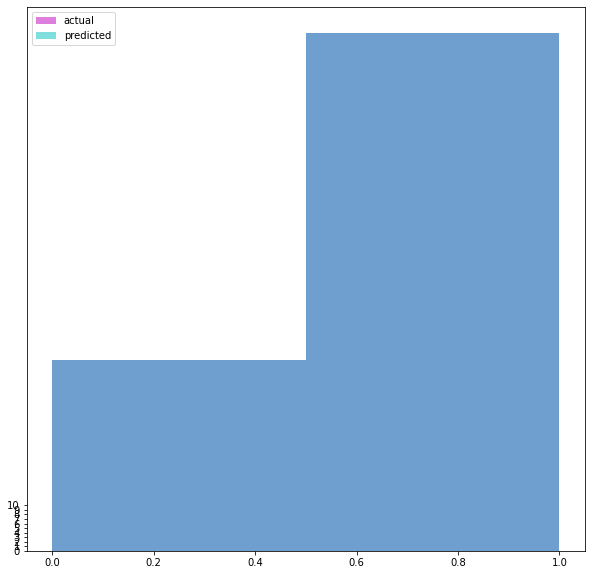

In [125]:
plt.rcParams['figure.figsize']=(10,10)
_,ax=plt.subplots()
ax.hist(Y_test,color='m',alpha=0.5,label='actual',bins=2)
ax.hist(y_pred1,color='c',alpha=0.5,label='predicted',bins=2)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc='best')
plt.show()

Conclusion:Therefore,by different kernel SVM models,we can conclude that the polynomial kernel SVM gives highest accuracy(96.15%).

So,we can use polynomial kernel SVM model to classify the area of burnt forest with high accuracy of 96.15%.